In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [8]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [11]:
mdata = mnist.load_data()
print(mdata)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [12]:
len(mdata) # train(학습데이터), test(테스트 데이터)

2

In [14]:
len(mdata[0])  # x,y 데이터 2개
len(mdata[1])  # 

10000

In [16]:
type(mdata[0][0])

numpy.ndarray

In [19]:
mdata[0][0].shape

(60000, 28, 28)

In [25]:
img = mdata[0][0][0]
print(mdata[0][1][0])

5


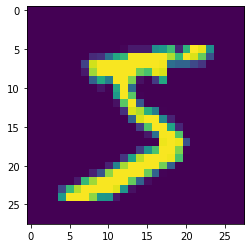

In [27]:
 plt.imshow(img)

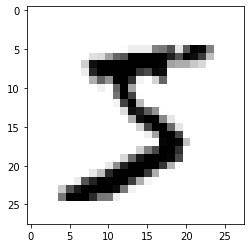

In [28]:
plt.imshow(img, cmap=plt.cm.binary)

In [35]:
def show_num(img, tag): # tag는 정답을 의미
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("tag : "+str(tag), size = 25)
  plt.show()

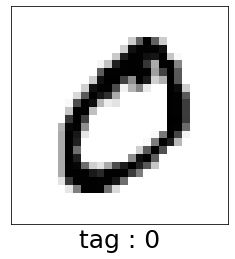

In [36]:
img = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(img, tag)

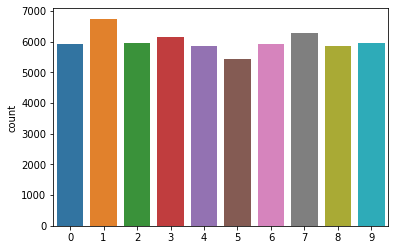

In [38]:
sns.countplot(mdata[0][1]) # 숫자가 몇개 있는가?

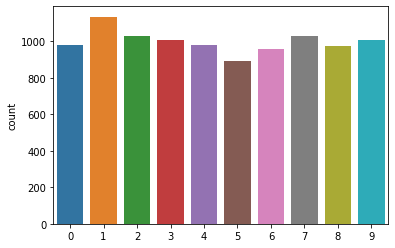

In [39]:
sns.countplot(mdata[1][1])

In [42]:
(x_train, y_train),(x_test, y_test) = mdata
print(len(x_train))
print(len(x_test))

60000
10000


In [46]:
x_train, x_test = x_train/255.0, x_test/255.0

In [55]:
x_train.max()

1.5378700499807765e-05

In [56]:
x_train.min()

0.0

In [54]:
print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
model.fit(x_train, y_train,epochs=10) # epochs : 반복학습을 n번 한다


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7905 - accuracy: 0.7376
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7894 - accuracy: 0.7384
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7831 - accuracy: 0.7408
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7841 - accuracy: 0.7412
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7836 - accuracy: 0.7404
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7902 - accuracy: 0.7396
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7841 - accuracy: 0.7408
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7851 - accuracy: 0.7404
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7802 - accuracy: 0.7427
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.781

In [84]:
model.evaluate(x_test, y_test, verbose=2) # verbose : 

313/313 - 0s - loss: 0.5434 - accuracy: 0.8574


[0.5433685779571533, 0.8574000000953674]

In [85]:
i = result[0].max()

In [86]:
result = model.predict(x_test)

In [87]:
result[0].tolist().index(i)

7

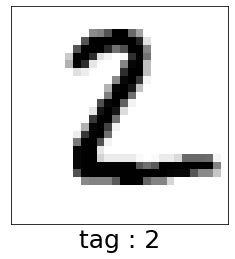

In [94]:
show_num(x_test[1], y_test[1])